___

<a href='https://sites.google.com/fat.uerj.br/livia'> <img src='../../figures/capa2.png' /></a>

___

# Matrix Plots

Os gráficos de matriz (Matrix Plots) permitem plotar dados como matrizes codificadas por cores e também podem ser usados para indicar clusters dentro dos dados (mais adiante, na seção de aprendizado de máquina, aprenderemos como agrupar dados formalmente).

Vamos começar explorando o mapa de calor e o mapa de cluster do seaborn:

In [1]:
import seaborn as sns
%matplotlib inline

In [7]:
flights = sns.load_dataset('flights')

In [10]:
tips = sns.load_dataset('tips')

In [11]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [4]:
flights.head()

,year,month,passengers
0,1949,January,112
1,1949,February,118
2,1949,March,132
3,1949,April,129
4,1949,May,121


## `heatmap` ou Mapa de calor

Para que um mapa de calor funcione corretamente, seus dados já devem estar em um formato de matriz, a função `sns.heatmap` basicamente apenas os colore para você. Por exemplo:

In [12]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [14]:
# Matrix form for correlation data
tips.corr()

,total_bill,tip,size
total_bill,1.000000,0.675734,0.598315
tip,0.675734,1.000000,0.489299
size,0.598315,0.489299,1.000000


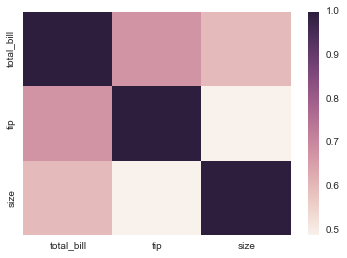

In [16]:
sns.heatmap(tips.corr())

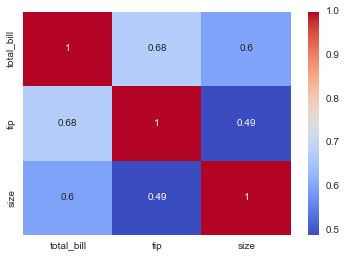

In [19]:
sns.heatmap(tips.corr(),cmap='coolwarm',annot=True)

Ou para os dados dos voos:

In [23]:
flights.pivot_table(values='passengers',index='month',columns='year')

year,1949,1950,1951,1952,1953,1954,1955,1956,1957,1958,1959,1960
month,,,,,,,,,,,,
January,112,115,145,171,196,204,242,284,315,340,360,417
February,118,126,150,180,196,188,233,277,301,318,342,391
March,132,141,178,193,236,235,267,317,356,362,406,419
April,129,135,163,181,235,227,269,313,348,348,396,461
May,121,125,172,183,229,234,270,318,355,363,420,472
June,135,149,178,218,243,264,315,374,422,435,472,535
July,148,170,199,230,264,302,364,413,465,491,548,622
August,148,170,199,242,272,293,347,405,467,505,559,606
September,136,158,184,209,237,259,312,355,404,404,463,508


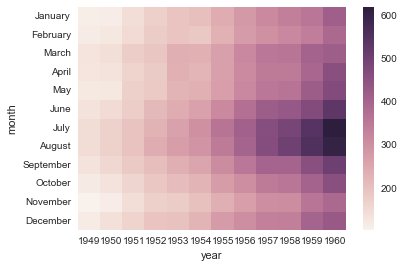

In [24]:
pvflights = flights.pivot_table(values='passengers',index='month',columns='year')
sns.heatmap(pvflights)

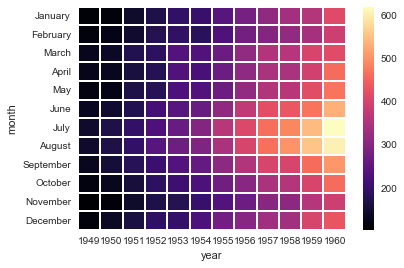

In [30]:
sns.heatmap(pvflights,cmap='magma',linecolor='white',linewidths=1)

## `clustermap`

O "mapa de cluster" usa clustering hierárquico para produzir uma versão em cluster do mapa de calor. Por exemplo:

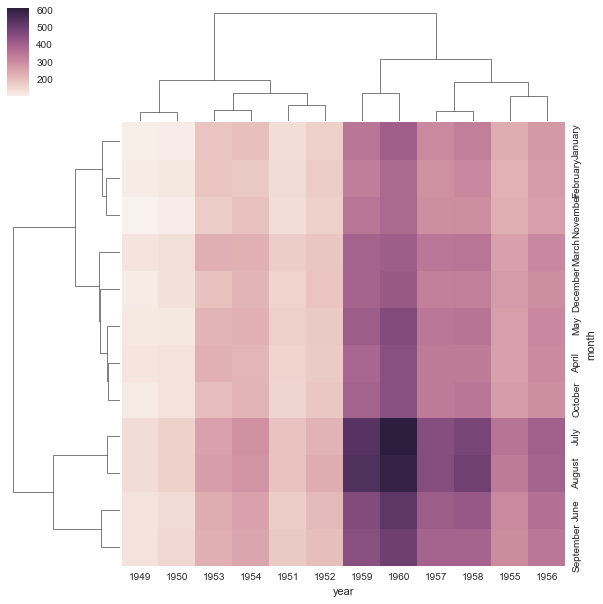

In [31]:
sns.clustermap(pvflights)

Observe agora como os anos e meses não estão mais em ordem, em vez disso, eles são agrupados por semelhança de valor (contagem de passageiros). Isso significa que podemos começar a inferir coisas desse plot, como agosto e julho sendo semelhantes (faz sentido, já que ambos são meses de viagem de verão)

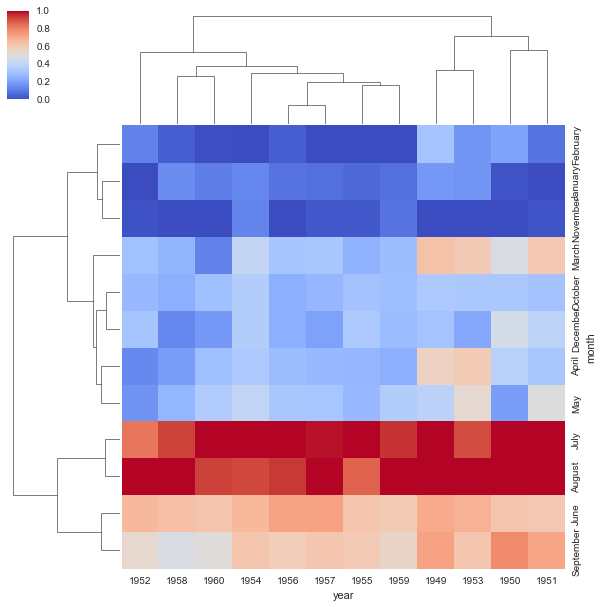

In [34]:
# More options to get the information a little clearer like normalization
sns.clustermap(pvflights,cmap='coolwarm',standard_scale=1)

# Bom Trabalho!